# Problem statement: The goal is to understand the relationship between house features and how these variables affect the house price.

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_excel(r"C:\Users\51101\Desktop\Social_media_Projects\Other\shank\DS - Assignment Part 1 data set.xlsx")
print(df.shape)
df.head()

(414, 9)


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [207]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


we can evaluate the relationship between each feature and target using a correlation and selecting those features that have the strongest relationship with the target variable.

In [208]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

<AxesSubplot:>

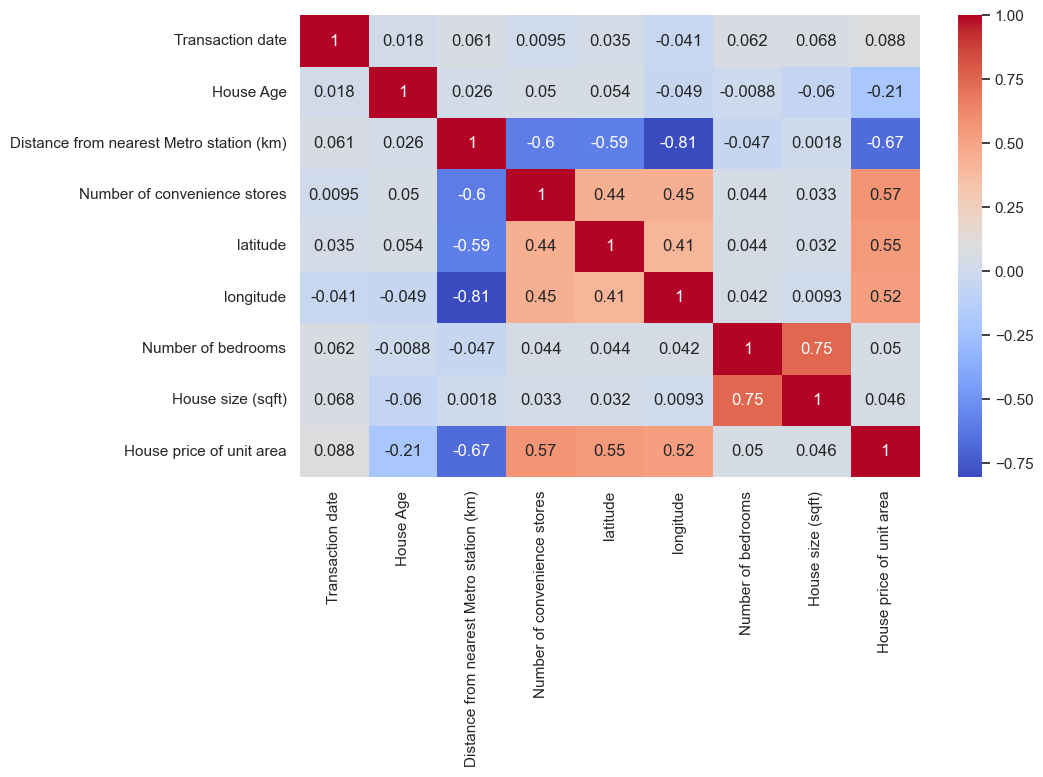

In [209]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# The target variable house price has high correlation with 'Number of convenience stores' with 0.57

# There is no multi colinearity among the variables

In [210]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

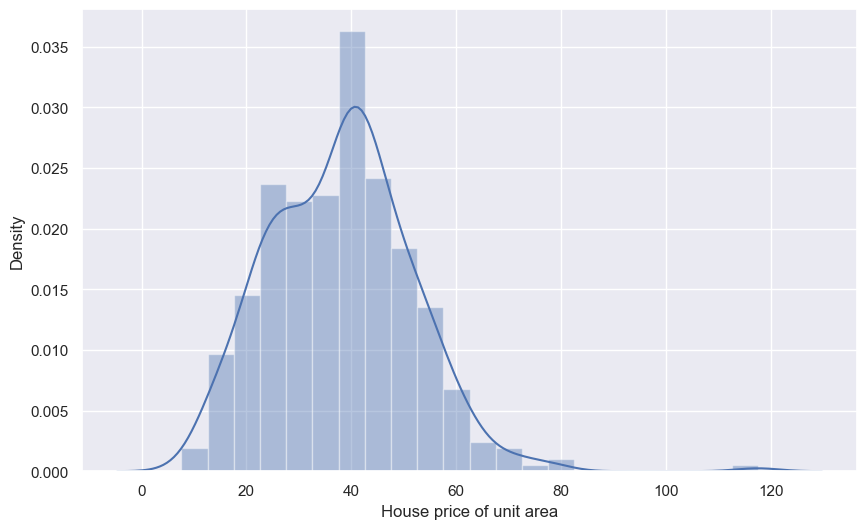

In [211]:
sns.distplot(df['House price of unit area'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Number of convenience stores', ylabel='House price of unit area'>

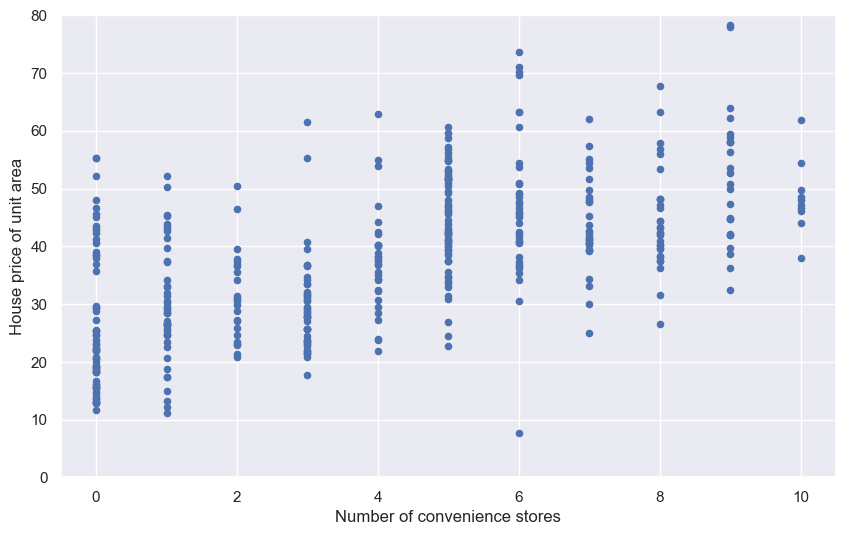

In [212]:
var = 'Number of convenience stores'
data = pd.concat([df['House price of unit area'], df[var]], axis=1)
data.plot.scatter(x=var, y='House price of unit area', ylim=(0,80))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Number of bedrooms', ylabel='House price of unit area'>

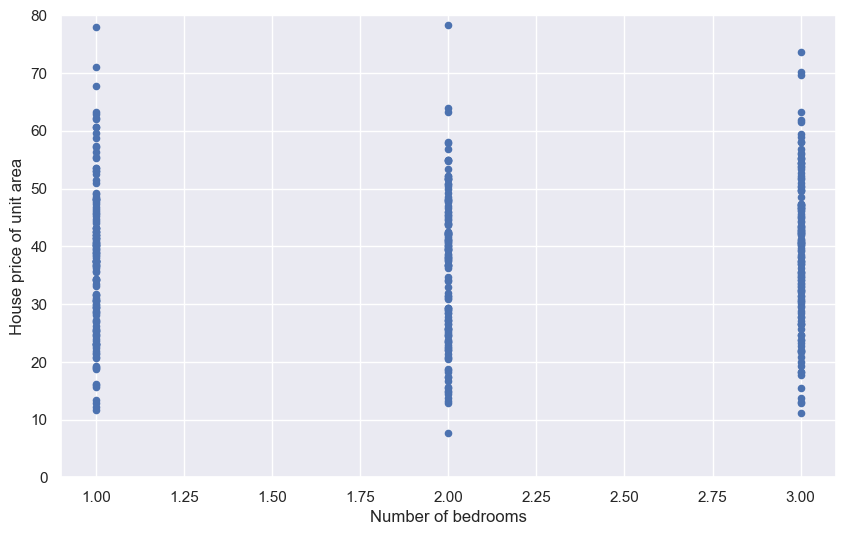

In [213]:
var = 'Number of bedrooms'
data = pd.concat([df['House price of unit area'], df[var]], axis=1)
data.plot.scatter(x=var, y='House price of unit area', ylim=(0,80))

In [214]:
df.drop(columns='Transaction date', inplace=True, axis=1)

### House price predictive Modelling

In [215]:
from sklearn.linear_model import LinearRegression, ridge_regression
from sklearn.model_selection import train_test_split

In [216]:
df.columns

Index(['House Age', 'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [217]:
X = df.drop(['House price of unit area'], axis=1)
y = df[['House price of unit area']]
## Normalize
from sklearn.preprocessing import Normalizer
scale=Normalizer()
NS=scale.fit_transform(X)
## Split the data
X_train, X_test, y_train, y_test = train_test_split(NS, y, test_size=0.2, random_state=3500)
X.shape, y.shape

((414, 7), (414, 1))

In [218]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#calculate Accuracy score of regression model on training set
train_accuracy = lr.score(X_train, y_train)
print(train_accuracy)
#calculate Accuracy score of regression model on testing set
test_accuracy = lr.score(X_test, y_test)
print(test_accuracy)

from sklearn.metrics import r2_score 
r2 = r2_score(y_test, y_pred)


0.6175630443208562
0.590932633518247


In [ ]:
# Adjusted R2

#display adjusted R-squared
1 - (1-lr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [219]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_pred))
print('MSE: %.2f' % MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))
print('R2 value:',r2.round(2))

MSE: 74.19
RMSE :  8.613498
R2 value: 0.59


Text(0, 0.5, 'y_pred')

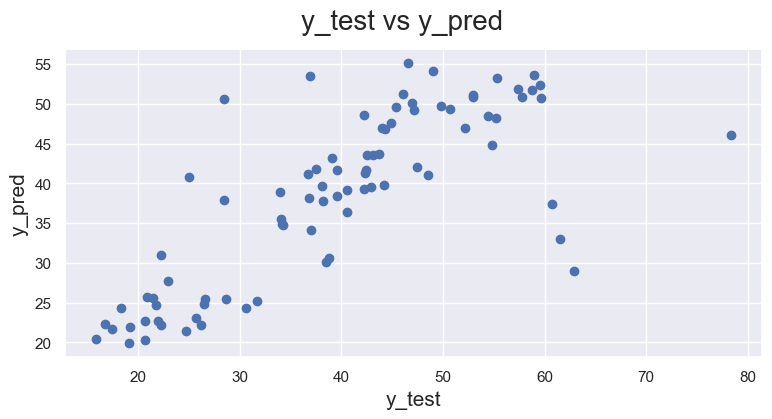

In [220]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(9, 4))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot heading 
plt.xlabel('y_test', fontsize=15) # X-label
plt.ylabel('y_pred', fontsize=15) # Y-label

In [221]:
# By XG Boost

In [222]:
import xgboost
from xgboost import XGBRegressor
xgb_r = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30000)

In [223]:
xgb_r.fit(X_train, y_train)
# Predict the model
prediction = xgb_r.predict(X_test)

[18:43:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [224]:
#calculate Accuracy score of regression model on training set
train_score = xgb_r.score(X_train, y_train)
print(train_score)
#calculate Accuracy score of regression model on testing set
test_score = xgb_r.score(X_test, y_test)
print(test_score)

0.9347714330544244
0.5594528581136693


In [225]:
from sklearn.metrics import r2_score 
xgr2 = r2_score(y_test, prediction)

In [226]:
# RMSE Computation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, prediction))
print('MSE: %.2f' % MSE(y_test, prediction))
print("RMSE : % f" %(rmse))
print('R2 value:',xgr2.round(2))

MSE: 118.38
RMSE :  10.880367
R2 value: 0.56


Text(0, 0.5, 'y_pred')

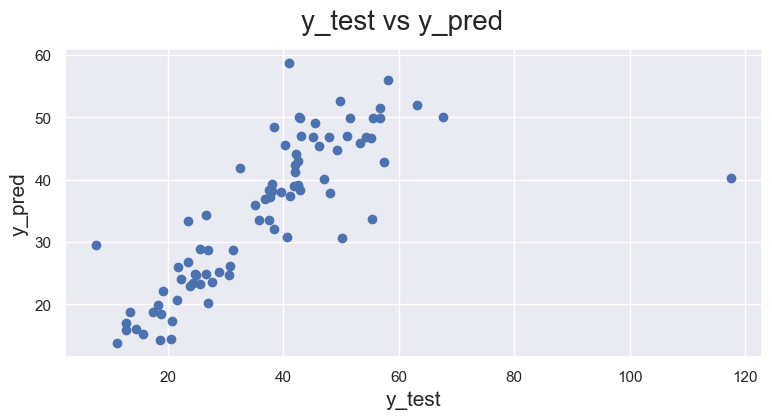

In [227]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(9, 4))
plt.scatter(y_test, prediction)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot heading 
plt.xlabel('y_test', fontsize=15) # X-label
plt.ylabel('y_pred', fontsize=15) # Y-label

In [228]:
# Lasso

In [229]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(NS, y, test_size=0.2, random_state=3500)
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
prediction_lass = lasso.predict(X_test)
trainl_score=lasso.score(X_train,y_train)
print('Train dataset accuracy score',trainl_score.round(1))
testl_score=lasso.score(X_test,y_test)
print('Test dataset accuracy score',testl_score.round(1))

Train dataset accuracy score 0.6
Test dataset accuracy score 0.5


In [230]:
# RMSE Computation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, prediction_lass))
print('MSE: %.2f' % MSE(y_test, prediction_lass))
print("RMSE : % f" %(rmse))
lassor2 = r2_score(y_test, prediction_lass)
print('R2 value:',lassor2.round(2))

MSE: 82.09
RMSE :  9.060118
R2 value: 0.55


In [231]:
# Ridge

In [232]:
from sklearn.linear_model import Ridge
Ridgee = Ridge(alpha=0.03)
Ridgee.fit(X_train,y_train)
prediction_ridge = Ridgee.predict(X_test)

rtrain_score=Ridgee.score(X_train,y_train)
print('Train dataset accuracy score',rtrain_score.round(1))
rtest_score=Ridgee.score(X_test,y_test)
print('Test dataset accuracy score',rtest_score.round(1))

Train dataset accuracy score 0.6
Test dataset accuracy score 0.6


In [233]:
# RMSE Computation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, prediction_ridge))
print('MSE: %.2f' % MSE(y_test, prediction_ridge))
print("RMSE : % f" %(rmse))
ridger2 = r2_score(y_test, prediction_ridge)
print('R2 value:',ridger2.round(2))

MSE: 78.32
RMSE :  8.849931
R2 value: 0.57


### Decision tree regressor

In [234]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)
regressor.fit(X_train, y_train)

y_pred_ds = regressor.predict(X_test)


In [235]:
dtrain_score=regressor.score(X_train,y_train)
print('Train dataset accuracy score',dtrain_score.round(2))
dtest_score=regressor.score(X_test,y_test)
print('Test dataset accuracy score',dtest_score.round(2))

Train dataset accuracy score 1.0
Test dataset accuracy score 0.72


In [236]:
# Metrics
rmse = np.sqrt(MSE(y_test, y_pred_ds))
print('MSE: %.2f' % MSE(y_test, y_pred_ds))
print("RMSE : % f" %(rmse))
deciscionr2 = r2_score(y_test, y_pred_ds)
print('R2 value:',deciscionr2.round(2))

MSE: 50.61
RMSE :  7.113876
R2 value: 0.72


### Random Forest Regressor

In [237]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
random = RandomForestRegressor(n_estimators = 100, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=200000)
# fit the regressor with x and y data
random.fit(X_train, y_train)
y_pred_rf = random.predict(X_test)


In [238]:
rtrain_score=random.score(X_train,y_train)
print('Train dataset accuracy score',rtrain_score.round(2))
rtest_score=random.score(X_test,y_test)
print('Test dataset accuracy score',rtest_score.round(2))

Train dataset accuracy score 0.95
Test dataset accuracy score 0.84


In [239]:
# Metrics
rmse = np.sqrt(MSE(y_test, y_pred_rf))
print('MSE: %.2f' % MSE(y_test, y_pred_rf))
print("RMSE : % f" %(rmse))
forest_r2 = r2_score(y_test, y_pred_rf)
print('R2 value:', forest_r2.round(2))

MSE: 30.67
RMSE :  5.537938
R2 value: 0.84


### Hyper Parameter tuning

BY RANDOM SEARCH CV: It moves within the grid in a random fashion to find the best set of hyperparameters. This approach reduces unnecessary computation. So i prefred the Random search instead of Grid search

In [240]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [241]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [242]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [243]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

##### The Best Parameters

In [244]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}  



##### By using the Best parameters building model

In [245]:
randmf = RandomForestRegressor(n_estimators = 20, min_samples_split = 10, min_samples_leaf= 3, max_features = 'sqrt', max_depth= 20, bootstrap=False) 
randmf.fit( X_train, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=3, min_samples_split=10,
                      n_estimators=20)

In [246]:
predictors = randmf.predict(X_test)

In [247]:
rtrain_score=randmf.score(X_train,y_train)
print('Train dataset accuracy score',rtrain_score.round(2))
rtest_score=randmf.score(X_test,y_test)
print('Test dataset accuracy score',rtest_score.round(2))

Train dataset accuracy score 0.88
Test dataset accuracy score 0.85


In [248]:
# Metrics
rmse = np.sqrt(MSE(y_test, predictors))
print('MSE: %.2f' % MSE(y_test, predictors))
print("RMSE : % f" %(rmse))
r2 = r2_score(y_test, predictors)
print('R2 value:', r2.round(2))

MSE: 29.15
RMSE :  5.399010
R2 value: 0.85


Text(0, 0.5, 'y_pred')

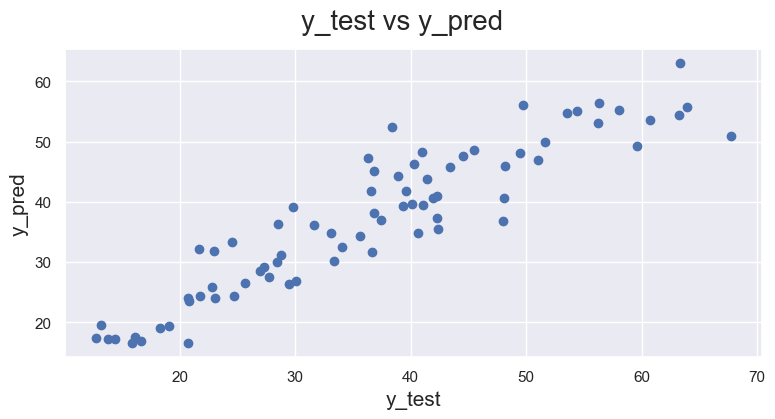

In [249]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(9, 4))
plt.scatter(y_test, predictors)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot heading 
plt.xlabel('y_test', fontsize=15) # X-label
plt.ylabel('y_pred', fontsize=15) # Y-label

# Final predictions and Observations

##### We build our House price prediction models with different Regression techniques

>>> With Linear Regression :--- We got MSE: 74.19
                                >>   RMSE :  8.613498
                                >> R2 value: 0.59   ### Our Linear Regression model will able to explain only 59% of data ###
            >> Train accuracy : 0.61
            >> Test data accuracy : 0.59
            >> Draw Back:-- Less accuracy

>>> With Lasso Regression :---- We got MSE: 82.09
                                >> RMSE :  9.060118
                                >> R2 value: 0.55  ### Our Lasso Regression model will able to explain only 55% of data ###
            >> Train dataset accuracy score 0.6
            >> Test dataset accuracy score 0.5 
            >> Draw Back:-- Less accuracy 


>>> With Ridge Regression :---- We got MSE: 78.32
                                >> RMSE :  8.849931
                                >> R2 value: 0.57  ### Our Ridge Regression model will able to explain only 57% of data ###
            >> Train dataset accuracy score 0.6
            >> Test dataset accuracy score 0.6 
            >> Draw Back:-- Less accuracy 


>>> With Decision tree Regression :---- We got MSE: 50.61
                                >> RMSE :  7.11
                                >> R2 value: 0.72  ### Our Decision Regression model will able to explain only 72% of data ### and error rate also decreased
            >> Train dataset accuracy score 1.0
            >> Test dataset accuracy score 0.72  
            >> Draw Back:-- Accuracy is 72% but model is over fitted 


>>> With Random forest Regression :---- We got MSE: 30.67
                                >> RMSE :  5.54
                                >> R2 value: 0.84  ### Our Random forest Regression model will able to explain 84% of data ### and error rate also decreased
            >> Train dataset accuracy score 0.95
            >> Test dataset accuracy score 0.84  
            >> Draw Back:-- We got better Accuracy is 84% but model is over fitted 


##########   SO FOR GETTING BEST FIT MODEL I PROCEEDED FOR HYPER PARAMETERS TUNING BY RANDOM FOREST #############

>>> With Random forest Regression :---- We got MSE: 29.15
                                >> RMSE :  5.4
                                >> R2 value: 0.85  ### Our Random forest Regression model will able to explain 85% of data ### and error rate also decreased
            >> Train dataset accuracy score 0.88
            >> Test dataset accuracy score 0.85  ## We got good accuracy model 


>>> I preferred model with less error rate (in means of MSE & RMSE) and Better accuracy on test scores.
>>> In Random forest Our Error rate RMSE decreased from 8.61 to 5.4 at the same time our model is perfectly fit. It given better accuracy when compared to the other models.
>>> Our Mean squre error is very less in Random forest Regression model when compared to other models.
>>> So I finalized Parameters tuned Random forest Regressor is best suitable model for House price prediction.

# Best fit models according to Test data scores

#### Random Forest_tuned :--- 0.85
#### Decision tree       :--- 0.72
#### Ridge Regression    :--- 0.60
#### Linear Regression   :--- 0.59
#### Lasso Regression    :--- 0.50


# So I finalized Parameters tuned Random forest Regressor is best suitable model for House price prediction


#### Predicted House prices for Test data 

In [272]:
X_test.reset_index(drop=True, inplace=True)

In [274]:
predictors =pd.DataFrame(predictors)
X_test['Predicted_House_Prices'] = predictors[0]

In [276]:
X_test.tail()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),Predicted_House_Prices
70,0.0,185.4296,0,24.97110,121.53170,3,818,48.646167
71,13.3,492.2313,5,24.96515,121.53737,1,421,44.368978
72,15.6,1756.4110,2,24.98320,121.51812,2,924,29.234292
73,40.9,167.5989,5,24.96630,121.54026,2,984,48.359778
74,12.9,187.4823,1,24.97388,121.52981,1,480,34.894476
